In [6]:
import dialysis_analysis
from dialysis_analysis.patient import Patient
from dialysis_analysis.prophet import ProphetCoregionalised
from dialysis_analysis.prophet import ProphetSimple
import dask_dp4gp

In [7]:
ip = 'local' #set to 'local' to disable

In [18]:
dask_dp4gp.install_libraries_on_workers(ip+':8786',['pip install git+https://github.com/lionfish0/dialysis_analysis.git'])

Installing 'pip install git+https://github.com/lionfish0/dialysis_analysis.git' on workers...
Installing 'pip install git+https://github.com/lionfish0/dialysis_analysis.git' on scheduler...


In [23]:
if 'installedonworkers' not in globals():#ensures this only gets run once/kernel!
    if (ip!='local') and (ip is not None):
        installedonworkers = True
        dask_dp4gp.install_libraries_on_workers(ip+':8786')

In [17]:
basepath = '/home/mike/Documents/Research/dialysis/analysis/AROextract'
datafiles = {'dial':basepath+'/dialysis/james_dial_20170303_v1.csv',
             'pat':basepath+'/patient/James_20170303_v1.csv',
             'hosp':basepath+'/hospitalisation/james_hosp_20170303_v1.csv',
             'lab':basepath+'/labtest/james_labtest_20170303_v2.csv',
             'comorbidity':basepath+'/comorbidity/james_comm_20170303_v1.txt',
             'uselist':basepath+'/PtPickPtCode.csv'}
ps = dialysis_analysis.loadpatientdata(datafiles,getevery=500)
dialysis_analysis.add_duration_shortfall(ps)

prophets = []
for p in ps[0:100]:
    patient_prophets = p.generate_all_prophets(ProphetSimple,300,['num_date','days_since_dialysis'],
                                   ['dt_heart_rate_pre'],['lt_value_albumin'],
                                   delta_dialysis=[('dt_heart_rate_pre','grad',3),
                                                   ('dt_duration','diff')],
                                   delta_lab=[('lt_value_albumin','grad',5)],skipstep=10
                                  )
    prophets.extend(patient_prophets)

for proph in prophets:
    proph.remove_outliers()
    
dialysis_analysis.compute_results(prophets[0:300],ip=ip)

#prior_models = dialysis_analysis.build_population_prior_model(prophets)

skipping time point 1 (Fewer than three training points.)
skipping time point 1 (Fewer than three training points.)
skipping time point 1 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 16 (Fewer than three training points.)


 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:90: RuntimeWarning:invalid value encountered in true_divide
 /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning:Mean of empty slice.
 /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:invalid value encountered in double_scalars


skipping time point 1 (Fewer than three training points.)
skipping time point 32 (Fewer than three training points.)
skipping time point 8 (Fewer than three training points.)
skipping time point 1 (Fewer than three training points.)
skipping time point 1 (Fewer than three training points.)
skipping time point 11 (Fewer than three training points.)
skipping time point 76 (Fewer than three training points.)
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 2 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 2 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 2 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 d

Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
Removing 1 items that have X[:,1]>4
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
removing 2 in region 0 due to being 4std out
r

 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:278: RuntimeWarning:invalid value encountered in less
 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:278: RuntimeWarning:invalid value encountered in greater
 /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning:Degrees of freedom <= 0 for slice
 /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning:invalid value encountered in true_divide
 /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning:invalid value encountered in double_scalars



removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
Removing 1 items that have X[:,1]>4
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due 

removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 2 in region 0 due to being 4std out
removing 2 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1 in region 0 due to being 4std out
removing 1 in region 1 due to being 4std out
removing 1

 /home/mike/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning:Degrees of freedom <= 0 for slice


Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to 

skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time 

 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:90: RuntimeWarning:invalid value encountered in true_divide
 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:90: RuntimeWarning:divide by zero encountered in true_divide


skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)


 /home/mike/anaconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to 

 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:114: RuntimeWarning:invalid value encountered in double_scalars


 /home/mike/anaconda3/lib/python3.6/site-packages/paramz/core/observable_array.py:169: RuntimeWarning:invalid value encountered in true_divide


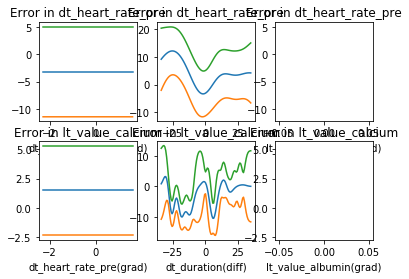

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
deltamodel.plot()

skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time point 0 (Fewer than three training points.)
skipping time 

 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:90: RuntimeWarning:invalid value encountered in true_divide
 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:90: RuntimeWarning:divide by zero encountered in true_divide


 /home/mike/anaconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to compute gradient, using 0 (error Fewer than three training points (in gradient method).)
Failed to 

 /home/mike/Documents/Research/dialysis_analysis/dialysis_analysis/prophet.py:114: RuntimeWarning:invalid value encountered in double_scalars
